In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/80], Train Loss: 1.7004, Test Loss: 1.6158
Epoch [2/80], Train Loss: 1.6114, Test Loss: 1.6007
Epoch [3/80], Train Loss: 1.5401, Test Loss: 1.5106
Epoch [4/80], Train Loss: 1.5060, Test Loss: 1.5020
Epoch [5/80], Train Loss: 1.4987, Test Loss: 1.5018
Epoch [6/80], Train Loss: 1.4945, Test Loss: 1.4954
Epoch [7/80], Train Loss: 1.4899, Test Loss: 1.4923
Epoch [8/80], Train Loss: 1.4877, Test Loss: 1.4951
Epoch [9/80], Train Loss: 1.4858, Test Loss: 1.4912
Epoch [10/80], Train Loss: 1.4844, Test Loss: 1.4893
Epoch [11/80], Train Loss: 1.4831, Test Loss: 1.4890
Epoch [12/80], Train Loss: 1.4819, Test Loss: 1.4892
Epoch [13/80], Train Loss: 1.4802, Test Loss: 1.4894
Epoch [14/80], Train Loss: 1.4804, Test Loss: 1.4934
Epoch [15/80], Train Loss: 1.4796, Test Loss: 1.4843
Epoch [16/80], Train Loss: 1.4779, Test Loss: 1.4851
Epoch [17/80], Train Loss: 1.4784, Test Loss: 1.4870
Epoch [18/80], Train Loss: 1.4769

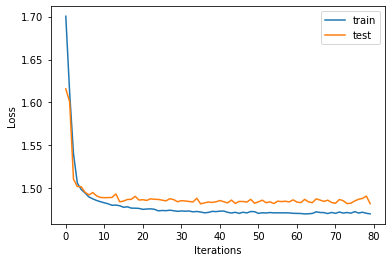

In [3]:


# Define the FNN model
class FNN(nn.Module):
    def __init__(self):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = x.view(-1, 784) # flatten the input image
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.softmax(self.fc4(x))
        return x

# Load the MNIST dataset
train_dataset = MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

# Set up the data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=128, shuffle=False)
model = FNN()
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model

train_loss_history = []
test_loss_history = []
num_epochs = 80
for epoch in range(num_epochs):
    running_train_loss = 0.0
    running_test_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item()
        
    for i, (images, labels) in enumerate(test_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        running_test_loss += loss.item()
        
    train_loss = running_train_loss / len(train_loader)
    test_loss = running_test_loss / len(test_loader)
    train_loss_history.append(train_loss)
    test_loss_history.append(test_loss)
    
    print('Epoch [{}/{}], Train Loss: {:.4f}, Test Loss: {:.4f}'
          .format(epoch+1, num_epochs, train_loss, test_loss))

# Plot the training and test loss curves
import matplotlib.pyplot as plt

plt.plot(train_loss_history, label='train')
plt.plot(test_loss_history, label='test')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()
